<a href="https://colab.research.google.com/github/aarushi-01/Electricity-Theft-detection-model/blob/main/LSTM%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# importing requirements

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.interpolate import pchip
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Reading data
df=pd.read_csv('/content/drive/My Drive/data.csv')
df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [25]:
# Step 1: Data Loading
data = df

# Step 2: Handling Missing Values with Pchip
# columns with dates start from index 2 onwards, you can interpolate the missing values as follows:

data.iloc[:, 2:] = data.iloc[:, 2:].apply(lambda x: x.interpolate(method='pchip', limit_area='inside', axis=0))
data.fillna(data.mean(),inplace=True)

# Step 3

X = data.drop(columns=['CONS_NO', 'FLAG'])
y = data['FLAG']

# Step 5: Model Training (Classification)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Further splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)'''

# Scaling Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

<ipython-input-25-bec365ea0581>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [26]:
# Print the sizes of each set
print("Train set size:", X_train.shape)
#print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (33897, 1034)
Test set size: (8475, 1034)


In [63]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# model initialisation
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# LSTM layers
model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))


Epoch 1/100
62/62 [==============================] - 18s 149ms/step - loss: 0.6779 - binary_accuracy: 0.6148 - val_loss: 0.4886 - val_binary_accuracy: 0.9159
Epoch 2/100
62/62 [==============================] - 7s 114ms/step - loss: 0.5087 - binary_accuracy: 0.7769 - val_loss: 0.3759 - val_binary_accuracy: 0.9159
Epoch 3/100
62/62 [==============================] - 7s 114ms/step - loss: 0.3954 - binary_accuracy: 0.8716 - val_loss: 0.2964 - val_binary_accuracy: 0.9159
Epoch 4/100
62/62 [==============================] - 7s 113ms/step - loss: 0.3363 - binary_accuracy: 0.8970 - val_loss: 0.2836 - val_binary_accuracy: 0.9159
Epoch 5/100
62/62 [==============================] - 7s 113ms/step - loss: 0.3019 - binary_accuracy: 0.9080 - val_loss: 0.2747 - val_binary_accuracy: 0.9142
Epoch 6/100
62/62 [==============================] - 7s 112ms/step - loss: 0.2888 - binary_accuracy: 0.9108 - val_loss: 0.2730 - val_binary_accuracy: 0.9159
Epoch 7/100
62/62 [==============================] - 7s 1

<Axes: title={'center': 'Accuracy'}>

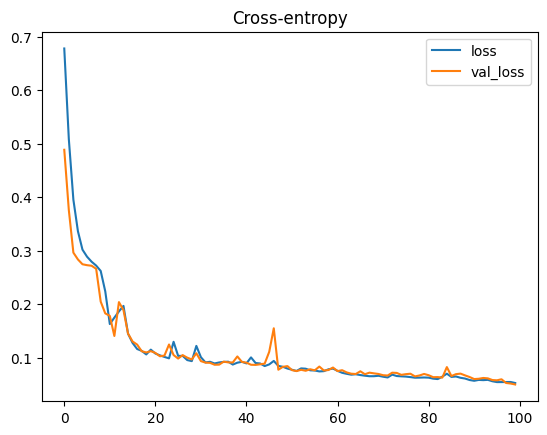

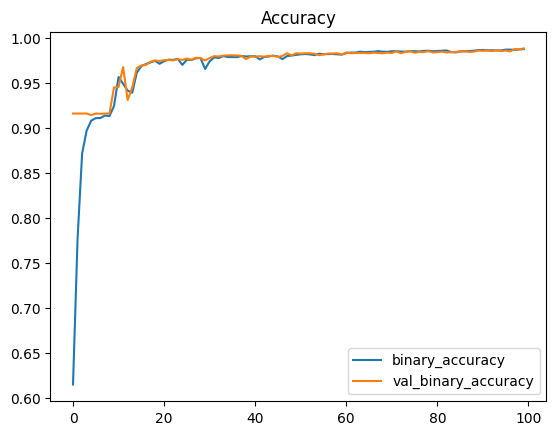

In [64]:
optimizer= Adam(learning_rate=0.001)
model.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train_reshaped, y_train,
    validation_split= 0.1,
    batch_size= 500,
    epochs=100,
    callbacks = early_stopping,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [65]:
model.evaluate(X_test_reshaped,y_test)

265/265 [==============================] - 3s 12ms/step - loss: 0.0455 - binary_accuracy: 0.9893


[0.045492980629205704, 0.9892625212669373]

265/265 [==============================] - 4s 10ms/step
Confusion Matrix:
[[7711    6]
 [  85  673]]


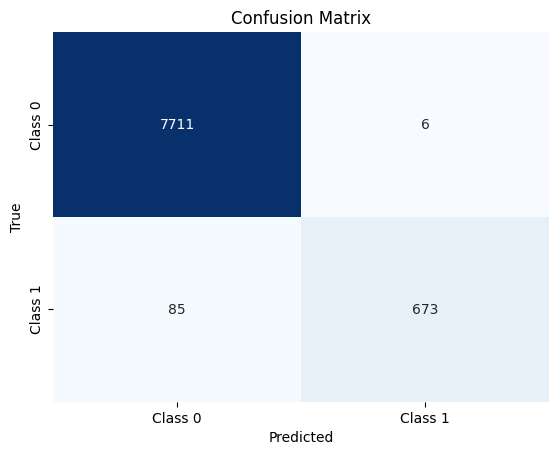

Accuracy: 0.9892625368731564
Precision: 0.9911634756995582
Recall: 0.8878627968337731
F1 Score: 0.9366736256089074
AUC: 0.9822655358094711


In [66]:

import seaborn as sns
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

print("Confusion Matrix:")
print(cm)
fig, ax = plt.subplots()

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

class_labels = ["Class 0", "Class 1"]
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

plt.show()

accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)